In [2]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [3]:
image = 'C:\\Users\\home\\PycharmProjects\\hello_pillow\\van gog - starry nigth.jpg'

In [4]:
img = plt.imread(image)
img.shape

(1600, 2560, 3)

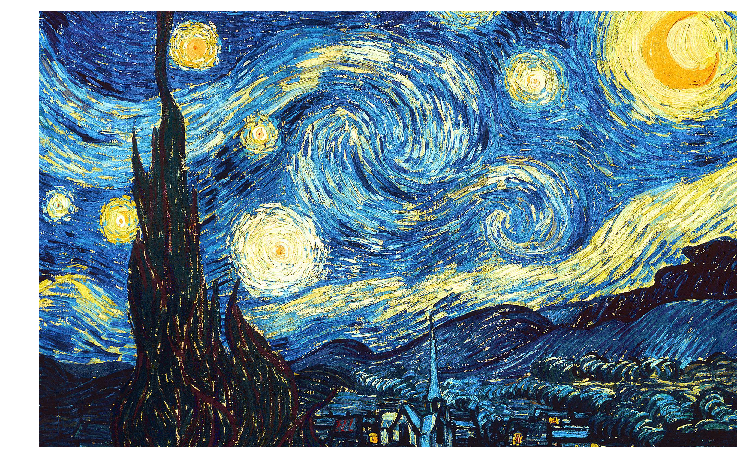

In [5]:
def plti(img, h=8, **kwargs):
    """
    Plot image
    """
    y = img.shape[0]
    x = img.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(img, interpolation='none', **kwargs)
    plt.axis('off')
    
plti(img, h=20)

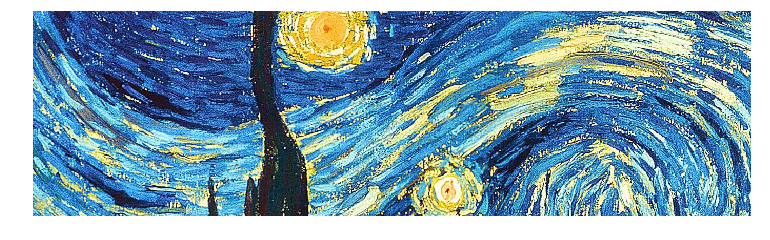

In [6]:
crop_img = img[100:500, :1400, :]
plti(crop_img, h=45)

In [8]:
def get_mosaic_area(img):
    width = img.shape[1]
    heigth = img.shape[0]
    wall_width = 500
    mosaic_width = mosaic_heigth = 2
    mosaic_count_in_width = 500 / 2
    mosaic_count_in_heigth = (heigth / width) * mosaic_count_in_width
    width_area = heigth_area = width / mosaic_count_in_width
    # heigth_area = heigth / mosaic_count_in_heigth
    print(width)
    print(heigth)
    print(wall_width)
    print(mosaic_width)
    print(mosaic_count_in_width)
    print(mosaic_count_in_heigth)
    print((width/heigth) == (mosaic_count_in_width/mosaic_count_in_heigth))
    print(width_area, heigth_area)
    return width_area

get_mosaic_area(img)

2560
1600
500
2
250.0
156.25
True
10.24 10.24


10.24

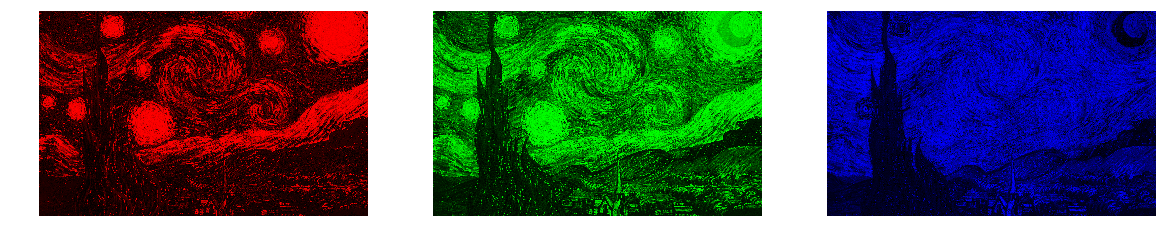

In [7]:
fix, axs = plt.subplots(nrows=1, ncols=3, figsize = (20, 30))

for c, ax in zip(range(3), axs):
    tmp_img = np.zeros(img.shape, dtype="uint8")
    tmp_img[:,:,c] = img[:,:,c]
    ax.imshow(tmp_img)
    ax.set_axis_off()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


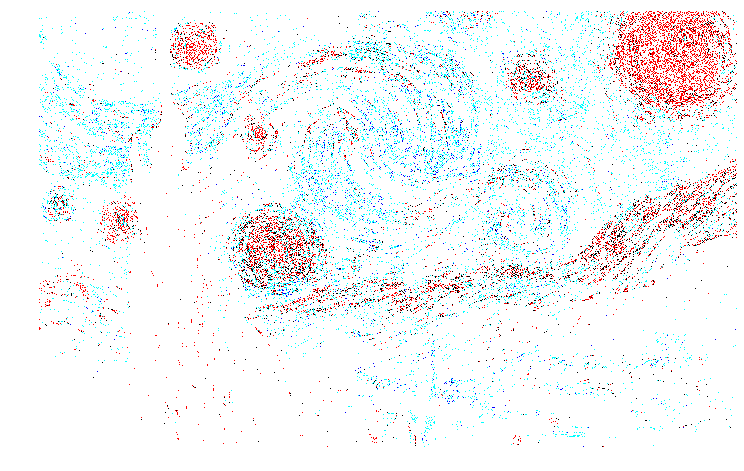

In [8]:
def do_normalise(img):
    return -np.log(1/((1 + img)/257) - 1)


def undo_normalise(img):
    return (1 + 1/(np.exp(-img) + 1) * 257)


def rotation_matrix(theta):
    """
    3D-rotation matrix around the X-axis by angle theta
    """
    return np.c_[
        [1,0,0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ]

img_normed = do_normalise(img)
img_rotated = np.einsum("ijk,lk->ijl", img_normed, rotation_matrix(np.pi))
img2 = undo_normalise(img_rotated)

plti(img2, h=20)

[[[  3  23  82]
  [  4  23  92]
  [ 10  28 114]
  ...
  [189 195  25]
  [229 220  83]
  [231 207 101]]

 [[ 23  39  88]
  [  0  15  74]
  [  0  15  92]
  ...
  [203 206  57]
  [228 217  89]
  [204 183  68]]

 [[ 48  56  92]
  [  3  14  59]
  [  9  23  84]
  ...
  [240 234 114]
  [252 239 124]
  [211 195  73]]

 ...

 [[ 41  25  35]
  [ 39  23  33]
  [ 37  21  31]
  ...
  [ 29  23  35]
  [ 26  20  32]
  [ 22  16  28]]

 [[ 42  26  36]
  [ 40  24  34]
  [ 36  23  32]
  ...
  [ 28  24  38]
  [ 25  21  35]
  [ 21  17  31]]

 [[ 41  28  37]
  [ 39  26  35]
  [ 36  23  33]
  ...
  [ 28  26  39]
  [ 25  23  36]
  [ 21  19  32]]]
[[[  3  23  82]
  [  4  23  92]
  [ 10  28 114]
  ...
  [189 195  25]
  [229 220  83]
  [231 207 101]]

 [[ 23  39  88]
  [  0  15  74]
  [  0  15  92]
  ...
  [203 206  57]
  [228 217  89]
  [204 183  68]]

 [[ 48  56  92]
  [  3  14  59]
  [  9  23  84]
  ...
  [240 234 114]
  [252 239 124]
  [211 195  73]]

 ...

 [[ 41  25  35]
  [ 39  23  33]
  [ 37  21  31]
  ..

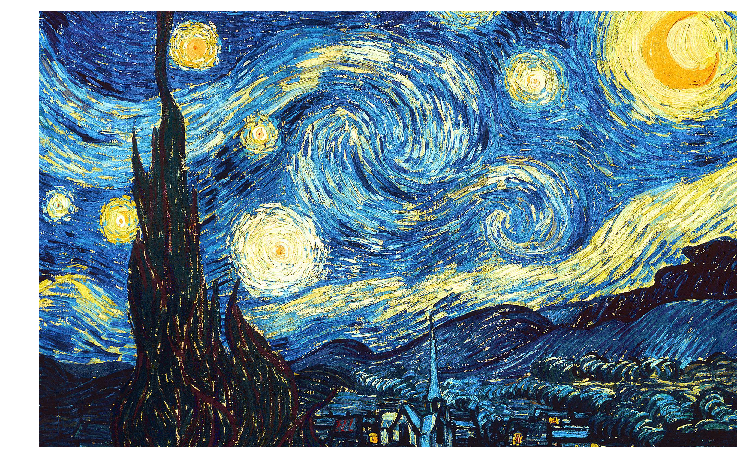

In [9]:
def to_average_colour(img):
    print(img)
    for i in img:
        i = img.mean()
    print(img)
    plti(img, h=20)
    
to_average_colour(img)

In [11]:
def to_grayscale(im, weights = np.c_[0.2989, 0.5870, 0.1140]):
    """
    Transforms a colour image to a greyscale image by
    taking the mean of the RGB values, weighted
    by the matrix weights
    """
    tile = np.tile(weights, reps=(im.shape[0],im.shape[1],1))
    return np.sum(tile * im, axis=2)

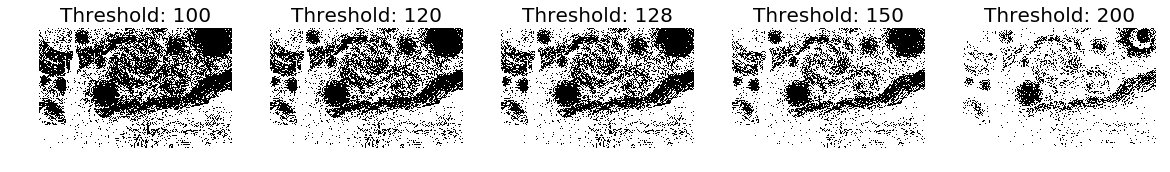

In [12]:
def simple_threshold(img, threshold=128):
    return ((img > threshold) * 255).astype('uint8')

thresholds = [100, 120, 128, 150, 200]

fig, axs = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(20,5))
gray_img = to_grayscale(img)

for t, ax in zip(thresholds, axs):
    ax.imshow(simple_threshold(gray_img, t), cmap='Greys')
    ax.set_title('Threshold: {}'.format(t), fontsize=20)
    ax.set_axis_off()